In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

In [5]:
raw_data = pd.read_csv('../data/amazon_sales_data_2025.csv')

In [6]:
raw_data.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


# Data Cleaning & Preparation

In [7]:
raw_data.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [9]:
raw_data.isna().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

In [10]:
df = raw_data.copy()
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [11]:
df.Date = pd.to_datetime(raw_data.Date, format= '%d-%m-%y', errors= 'coerce')

In [12]:
df.columns = df.columns.str.lower()

In [13]:
df.columns = df.columns.str.replace(' ', '_')

In [14]:
df.columns

Index(['order_id', 'date', 'product', 'category', 'price', 'quantity',
       'total_sales', 'customer_name', 'customer_location', 'payment_method',
       'status'],
      dtype='object')

In [15]:
df['data_month'] = df.date.dt.strftime('%b')

In [16]:
df['data_day'] = df.date.dt.day

In [17]:
df.head()

,order_id,date,product,category,price,quantity,total_sales,customer_name,customer_location,payment_method,status,data_month,data_day
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled,Mar,14
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending,Mar,20
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled,Feb,15
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending,Feb,19
4,ORD0005,2025-03-10,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending,Mar,10


In [18]:
df = df.rename(columns={'data_month': 'date_month', 'data_day': 'date_day'})

In [19]:
df.head(10)

,order_id,date,product,category,price,quantity,total_sales,customer_name,customer_location,payment_method,status,date_month,date_day
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled,Mar,14
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending,Mar,20
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled,Feb,15
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending,Feb,19
4,ORD0005,2025-03-10,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending,Mar,10
5,ORD0006,2025-03-14,T-Shirt,Clothing,20,1,20,John Doe,Dallas,Credit Card,Pending,Mar,14
6,ORD0007,2025-03-18,Smartwatch,Electronics,150,4,600,Emma Clark,Houston,PayPal,Completed,Mar,18
7,ORD0008,2025-03-02,Smartphone,Electronics,500,1,500,Sophia Miller,Miami,PayPal,Completed,Mar,2
8,ORD0009,2025-03-08,T-Shirt,Clothing,20,3,60,Sophia Miller,Boston,PayPal,Completed,Mar,8
9,ORD0010,2025-03-12,Smartphone,Electronics,500,1,500,Emily Johnson,San Francisco,Credit Card,Cancelled,Mar,12


In [20]:
df.duplicated().sum()

np.int64(0)

In [29]:
(df.price * df.quantity == df.total_sales).all()

np.True_

# Data Exploration

## Sales Overview

In [32]:
total_revenue = df.total_sales[df.status == 'Completed'].sum()
total_revenue

np.int64(88530)

In [34]:
df.price.describe()

count     250.000000
mean      343.580000
std       380.635808
min        15.000000
25%        40.000000
50%       150.000000
75%       600.000000
max      1200.000000
Name: price, dtype: float64

In [35]:
df.quantity[df.status == 'Completed'].sum()

np.int64(256)

In [103]:
df.quantity.sum()

np.int64(714)

In [37]:
df.groupby('status').status.value_counts().sort_values(ascending=False)

status
Completed    88
Pending      85
Cancelled    77
Name: count, dtype: int64

## Category Performance

In [94]:
df.groupby('category').price.median().sort_values(ascending = False)

category
Home Appliances    1200.0
Electronics         325.0
Footwear             60.0
Clothing             30.0
Books                15.0
Name: price, dtype: float64

In [38]:
df.groupby('category').total_sales.sum().sort_values(ascending= False)

category
Electronics        129950
Home Appliances    105000
Footwear             4320
Clothing             3540
Books                1035
Name: total_sales, dtype: int64

In [26]:
category_analysis = df[df.status == 'Completed'].groupby('category').total_sales.sum().sort_values(ascending= False)
category_analysis

category
Electronics        55900
Home Appliances    29400
Footwear            1620
Clothing            1400
Books                210
Name: total_sales, dtype: int64

In [40]:
df.groupby('category').quantity.sum().sort_values(ascending= False)

category
Electronics        348
Clothing           115
Home Appliances    110
Footwear            72
Books               69
Name: quantity, dtype: int64

In [41]:
df[df.status == 'Completed'].groupby('category').quantity.sum().sort_values(ascending= False)

category
Electronics        136
Clothing            49
Home Appliances     30
Footwear            27
Books               14
Name: quantity, dtype: int64

In [42]:
df[df.status == 'Cancelled'].groupby('category').quantity.sum().sort_values(ascending= False)

category
Electronics        92
Home Appliances    40
Clothing           32
Footwear           18
Books              12
Name: quantity, dtype: int64

In [27]:
category_cancel_analysis = df[df.status == 'Cancelled'].groupby('category').total_sales.sum().sort_values(ascending= False)
category_cancel_analysis

category
Home Appliances    36000
Electronics        26650
Clothing            1120
Footwear            1080
Books                180
Name: total_sales, dtype: int64

## Product Analysis

In [44]:
df.groupby('product').total_sales.sum().sort_values(ascending= False)

product
Refrigerator       78000
Laptop             58400
Smartphone         48500
Washing Machine    27000
Smartwatch         15750
Headphones          7300
Running Shoes       4320
Jeans               2480
T-Shirt             1060
Book                1035
Name: total_sales, dtype: int64

In [46]:
df[df.status == 'Completed'].groupby('product').total_sales.sum().sort_values(ascending= False)

product
Laptop             25600
Refrigerator       22800
Smartphone         22000
Smartwatch          6900
Washing Machine     6600
Running Shoes       1620
Headphones          1400
Jeans                840
T-Shirt              560
Book                 210
Name: total_sales, dtype: int64

In [47]:
df.groupby('product').quantity.sum().sort_values(ascending= False)

product
Smartwatch         105
Smartphone          97
Laptop              73
Headphones          73
Running Shoes       72
Book                69
Refrigerator        65
Jeans               62
T-Shirt             53
Washing Machine     45
Name: quantity, dtype: int64

In [48]:
df[df.status == 'Completed'].groupby('product').quantity.sum().sort_values(ascending= False)

product
Smartwatch         46
Smartphone         44
Laptop             32
T-Shirt            28
Running Shoes      27
Jeans              21
Refrigerator       19
Book               14
Headphones         14
Washing Machine    11
Name: quantity, dtype: int64

In [49]:
df[df.status == 'Cancelled'].groupby('product').total_sales.sum().sort_values(ascending= False)

product
Refrigerator       24000
Washing Machine    12000
Laptop              9600
Smartphone          9500
Smartwatch          4350
Headphones          3200
Running Shoes       1080
Jeans                960
Book                 180
T-Shirt              160
Name: total_sales, dtype: int64

In [101]:
df[df.status == 'Cancelled'].groupby('product').quantity.sum().sort_values(ascending= False)

product
Headphones         32
Smartwatch         29
Jeans              24
Washing Machine    20
Refrigerator       20
Smartphone         19
Running Shoes      18
Book               12
Laptop             12
T-Shirt             8
Name: quantity, dtype: int64

In [55]:
df.groupby('category')[['price', 'quantity']].median().sort_values(by='price', ascending=False)

,price,quantity
category,,
Home Appliances,1200.0,3.0
Electronics,325.0,3.0
Footwear,60.0,2.0
Clothing,30.0,2.5
Books,15.0,2.0


In [56]:
df.groupby('product')[['price', 'quantity']].median().sort_values(by='price', ascending=False)

,price,quantity
product,,
Refrigerator,1200.0,3.0
Laptop,800.0,3.0
Washing Machine,600.0,3.0
Smartphone,500.0,3.0
Smartwatch,150.0,3.0
Headphones,100.0,3.0
Running Shoes,60.0,2.0
Jeans,40.0,3.0
T-Shirt,20.0,2.0


## Payment Method Analysis

In [29]:
payment_method_analysis = df.groupby('payment_method').payment_method.count().sort_values(ascending= False)
payment_method_analysis

payment_method
PayPal         60
Credit Card    54
Debit Card     53
Gift Card      42
Amazon Pay     41
Name: payment_method, dtype: int64

In [59]:
df[df.status == 'Completed'].groupby('payment_method').payment_method.count().sort_values(ascending= False)

payment_method
PayPal         30
Amazon Pay     21
Credit Card    17
Debit Card     14
Gift Card       6
Name: payment_method, dtype: int64

In [28]:
payment_method_cancel_analysis = df[df.status == 'Cancelled'].groupby('payment_method').payment_method.count().sort_values(ascending= False)
payment_method_cancel_analysis

payment_method
Debit Card     20
Gift Card      18
Credit Card    16
PayPal         16
Amazon Pay      7
Name: payment_method, dtype: int64

## Cities Analysis

In [88]:
top_5_cities = df[df.status == 'Completed'].groupby('customer_location').total_sales.sum().sort_values(ascending = False).head()
top_5_cities

customer_location
Miami          11680
Houston        11570
Los Angeles    11370
Denver         10370
Seattle         9425
Name: total_sales, dtype: int64

In [82]:
df.groupby(['customer_location', 'payment_method'])['payment_method'].count()

customer_location  payment_method
Boston             Amazon Pay        3
                   Credit Card       3
                   Debit Card        4
                   Gift Card         7
                   PayPal            9
Chicago            Amazon Pay        6
                   Credit Card       3
                   Debit Card        3
                   Gift Card         4
                   PayPal            6
Dallas             Amazon Pay        2
                   Credit Card       9
                   Debit Card        5
                   Gift Card         6
                   PayPal            7
Denver             Amazon Pay        5
                   Credit Card       4
                   Debit Card        3
                   Gift Card         5
                   PayPal            9
Houston            Amazon Pay        5
                   Credit Card       8
                   Debit Card        6
                   Gift Card         5
                   PayPal     

In [95]:
df.groupby(['customer_location', 'category']).quantity.sum()

customer_location  category       
Boston             Books               8
                   Clothing           12
                   Electronics        35
                   Footwear            3
                   Home Appliances    11
Chicago            Books              14
                   Clothing            9
                   Electronics        31
                   Footwear            4
                   Home Appliances     7
Dallas             Books               5
                   Clothing           27
                   Electronics        23
                   Footwear            8
                   Home Appliances    19
Denver             Books               5
                   Clothing           18
                   Electronics        32
                   Footwear            6
                   Home Appliances    14
Houston            Books               2
                   Clothing            4
                   Electronics        58
                   Foo

In [99]:
df[df.status == 'Completed'].groupby(['customer_location', 'category']).quantity.sum()

customer_location  category       
Boston             Books               3
                   Clothing           11
                   Electronics        12
                   Home Appliances     3
Chicago            Clothing            2
                   Electronics        13
                   Footwear            4
Dallas             Clothing           15
                   Electronics         5
                   Home Appliances     5
Denver             Clothing           10
                   Electronics        15
                   Footwear            2
                   Home Appliances     2
Houston            Clothing            4
                   Electronics        42
                   Footwear            9
Los Angeles        Books               2
                   Electronics        11
                   Footwear            4
                   Home Appliances     3
Miami              Electronics        13
                   Footwear            8
                   Hom

In [102]:
df[df.status == 'Cancelled'].groupby(['customer_location', 'category']).quantity.sum()

customer_location  category       
Boston             Books               3
                   Electronics         7
                   Footwear            1
                   Home Appliances     4
Chicago            Books               4
                   Electronics         7
                   Home Appliances     2
Dallas             Clothing            6
                   Electronics         9
                   Home Appliances    14
Denver             Clothing            4
                   Electronics         6
                   Footwear            4
                   Home Appliances     8
Houston            Books               1
                   Electronics         7
                   Footwear            3
                   Home Appliances     4
Los Angeles        Clothing            2
                   Electronics        14
                   Footwear            7
Miami              Books               3
                   Clothing            4
                   Ele

In [96]:
df.groupby(['customer_location', 'category']).total_sales.sum()

customer_location  category       
Boston             Books                120
                   Clothing             320
                   Electronics        12950
                   Footwear             180
                   Home Appliances    12600
Chicago            Books                210
                   Clothing             260
                   Electronics        12900
                   Footwear             240
                   Home Appliances     7200
Dallas             Books                 75
                   Clothing             940
                   Electronics         6450
                   Footwear             480
                   Home Appliances    19200
Denver             Books                 75
                   Clothing             400
                   Electronics        13950
                   Footwear             360
                   Home Appliances    15000
Houston            Books                 30
                   Clothing              

## Sales Over Time Analysis

In [21]:
df.groupby('date_month').quantity.sum().sort_values(ascending= False)

date_month
Mar    367
Feb    326
Apr     21
Name: quantity, dtype: int64

In [67]:
df.groupby('date_day').quantity.median().sort_values(ascending= False)

date_day
29    4.5
5     4.0
2     4.0
25    4.0
30    4.0
18    3.5
3     3.0
15    3.0
10    3.0
17    3.0
22    3.0
6     3.0
4     3.0
7     3.0
8     3.0
31    3.0
24    3.0
19    3.0
20    3.0
11    2.5
13    2.5
16    2.5
21    2.5
28    2.0
14    2.0
9     2.0
1     2.0
26    2.0
27    1.5
12    1.0
23    1.0
Name: quantity, dtype: float64

In [24]:
monthly_analysis = df.groupby('date_month').total_sales.sum().sort_values(ascending= False)
monthly_analysis

date_month
Feb    122695
Mar    117730
Apr      3420
Name: total_sales, dtype: int64

In [54]:
daily_analysis = df.groupby('date_day').total_sales.median()
daily_analysis

date_day
1      250.0
2      500.0
3      110.0
4     1300.0
5      300.0
6     1800.0
7     1000.0
8      300.0
9      150.0
10     625.0
11     525.0
12     120.0
13     400.0
14     110.0
15     450.0
16     450.0
17     200.0
18     975.0
19     180.0
20     200.0
21     800.0
22     190.0
23     270.0
24     675.0
25     600.0
26     200.0
27      50.0
28    1000.0
29    1300.0
30    1225.0
31     400.0
Name: total_sales, dtype: float64

In [72]:
df[df.date_day == 6].groupby('category').total_sales.sum().sort_values(ascending= False)

category
Home Appliances    13800
Electronics         7200
Footwear             120
Name: total_sales, dtype: int64

In [73]:
df[df.date_day == 6].groupby('product').total_sales.sum().sort_values(ascending= False)

product
Refrigerator       10800
Smartphone          6000
Washing Machine     3000
Laptop               800
Headphones           400
Running Shoes        120
Name: total_sales, dtype: int64

In [74]:
df[df.date_day == 29].groupby('product').quantity.median().sort_values(ascending= False)

product
Jeans              5.0
Washing Machine    4.0
Name: quantity, dtype: float64

## Customers Analysis

In [84]:
df.groupby('customer_name').total_sales.sum().sort_values(ascending= False)

customer_name
Olivia Wilson    36170
Jane Smith       31185
Emma Clark       29700
John Doe         26870
Emily Johnson    23475
David Lee        22665
Michael Brown    22655
Daniel Harris    18945
Chris White      18885
Sophia Miller    13295
Name: total_sales, dtype: int64

In [85]:
df.groupby('customer_name').quantity.sum().sort_values(ascending= False)

customer_name
Emma Clark       95
Jane Smith       88
Olivia Wilson    83
Michael Brown    75
David Lee        72
John Doe         71
Emily Johnson    66
Daniel Harris    66
Chris White      56
Sophia Miller    42
Name: quantity, dtype: int64

In [87]:
df.groupby(['customer_name', 'category']).quantity.sum()

customer_name  category       
Chris White    Books               5
               Clothing            7
               Electronics        25
               Footwear            8
               Home Appliances    11
Daniel Harris  Books               9
               Clothing           16
               Electronics        35
               Home Appliances     6
David Lee      Books              19
               Clothing            9
               Electronics        24
               Footwear            6
               Home Appliances    14
Emily Johnson  Books               1
               Clothing            5
               Electronics        45
               Footwear            6
               Home Appliances     9
Emma Clark     Books               6
               Clothing           13
               Electronics        43
               Footwear           20
               Home Appliances    13
Jane Smith     Books               7
               Clothing           20
       

In [92]:
df.groupby(['customer_name', 'category']).total_sales.sum()

customer_name  category       
Chris White    Books                 75
               Clothing             180
               Electronics         8550
               Footwear             480
               Home Appliances     9600
Daniel Harris  Books                135
               Clothing             560
               Electronics        11050
               Home Appliances     7200
David Lee      Books                285
               Clothing             320
               Electronics         6100
               Footwear             360
               Home Appliances    15600
Emily Johnson  Books                 15
               Clothing             200
               Electronics        15100
               Footwear             360
               Home Appliances     7800
Emma Clark     Books                 90
               Clothing             260
               Electronics        18550
               Footwear            1200
               Home Appliances     9600
Jane Smit

In [93]:
df.groupby(['customer_name', 'payment_method']).total_sales.sum()

customer_name  payment_method
Chris White    Amazon Pay          360
               Credit Card        7580
               Debit Card         6240
               Gift Card          2085
               PayPal             2620
Daniel Harris  Amazon Pay          770
               Credit Card        7800
               Debit Card          615
               Gift Card          5260
               PayPal             4500
David Lee      Amazon Pay          200
               Credit Card         135
               Debit Card          930
               Gift Card         13090
               PayPal             8310
Emily Johnson  Amazon Pay         4450
               Credit Card        3115
               Debit Card         1800
               Gift Card          3270
               PayPal            10840
Emma Clark     Amazon Pay         9165
               Credit Card        9655
               Debit Card         3970
               Gift Card          6150
               PayPal             

In [97]:
df[df.status == 'Cancelled'].groupby(['customer_name', 'category']).quantity.sum()

customer_name  category       
Chris White    Books               3
               Clothing            4
               Electronics         7
               Home Appliances     5
Daniel Harris  Books               4
               Clothing            7
               Electronics         8
               Home Appliances     2
David Lee      Books               1
               Clothing            9
               Electronics         4
               Footwear            5
               Home Appliances     7
Emily Johnson  Electronics        15
               Footwear            2
               Home Appliances     5
Emma Clark     Books               1
               Electronics         7
               Footwear            8
               Home Appliances     4
Jane Smith     Books               2
               Electronics        19
               Footwear            1
               Home Appliances     7
John Doe       Clothing            4
               Electronics         8
       

# Visualization

## Sales Overview

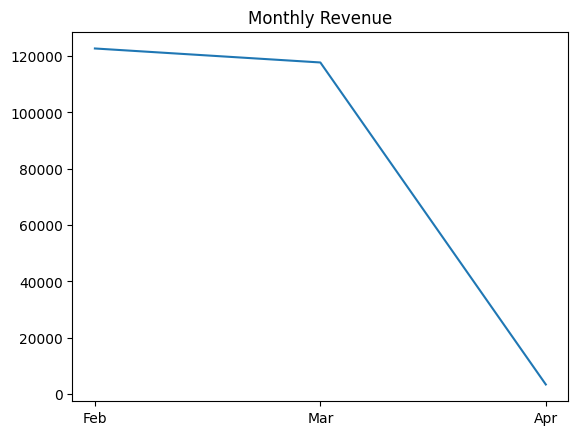

In [97]:
plt.plot(monthly_analysis.index, monthly_analysis.values)
plt.title('Monthly Revenue')
plt.show()

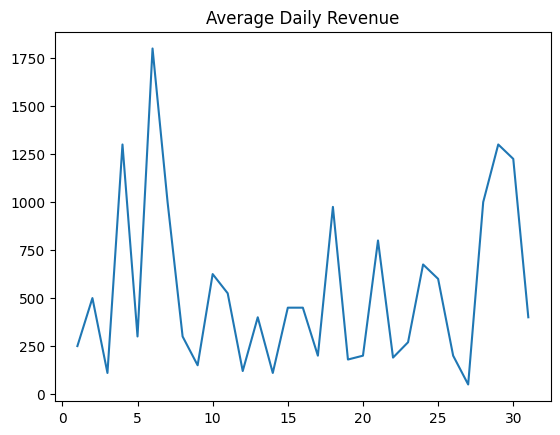

In [99]:
plt.plot(daily_analysis.index, daily_analysis.values)
plt.title('Average Daily Revenue')
plt.show()

## Category Performance

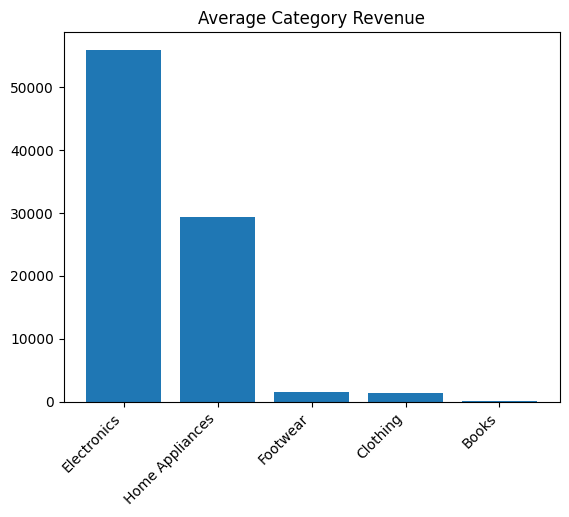

In [101]:
plt.bar(category_analysis.index, category_analysis.values)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Average Category Revenue')
plt.show()

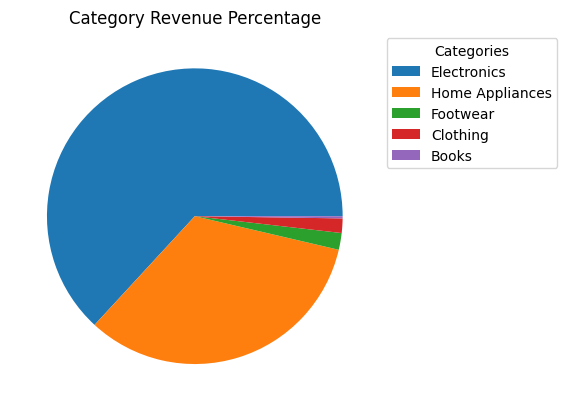

In [103]:
plt.pie(category_analysis.values)
plt.legend(category_analysis.index, loc="upper left", title="Categories", bbox_to_anchor=(1, 0, 0, 1))
plt.title('Category Revenue Percentage')
plt.show()

## Cancellation Analysis

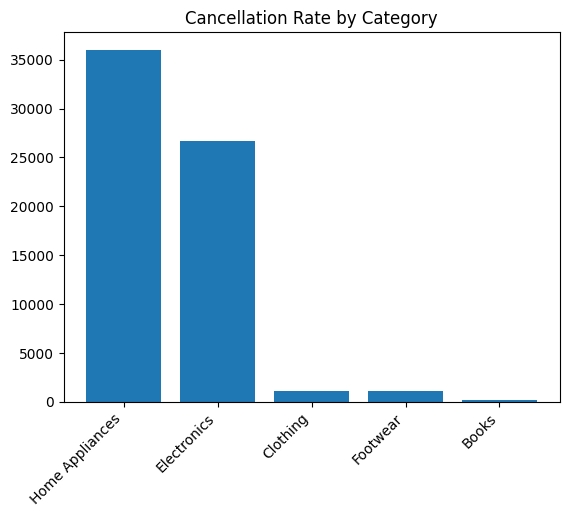

In [105]:
plt.bar(category_cancel_analysis.index, category_cancel_analysis.values)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Cancellation Rate by Category')
plt.show()

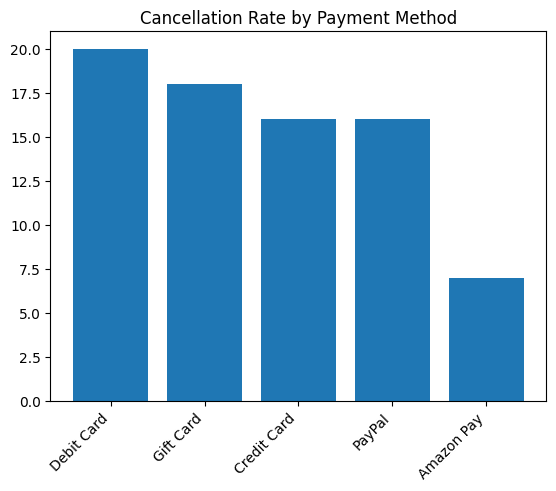

In [82]:
plt.bar(payment_method_cancel_analysis.index, payment_method_cancel_analysis.values)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Cancellation Rate by Payment Method')
plt.show()

## Payment Methods

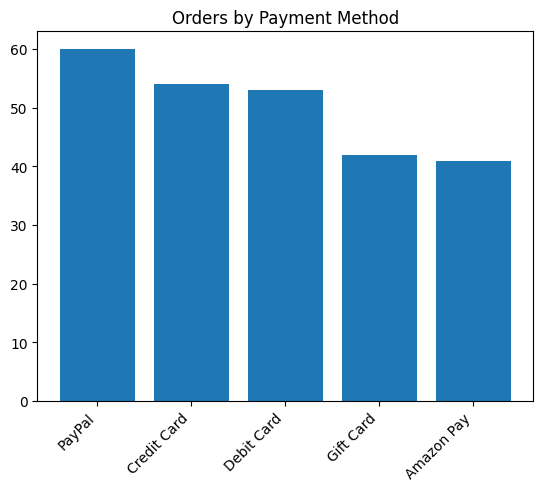

In [107]:
plt.bar(payment_method_analysis.index, payment_method_analysis.values)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Orders by Payment Method')
plt.show()

## Geographical Analysis

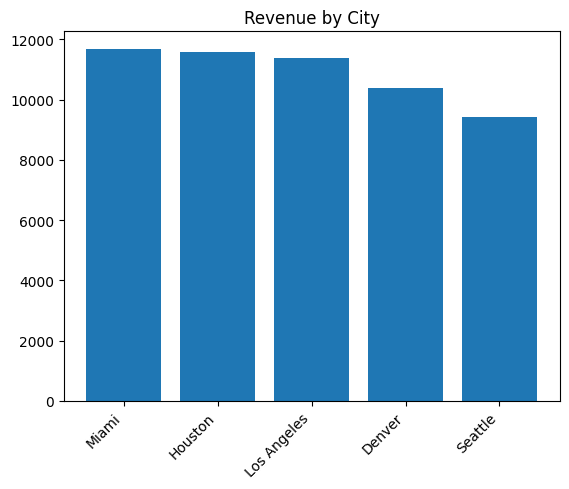

In [109]:
plt.bar(top_5_cities.index, top_5_cities.values)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Revenue by City')
plt.show()